In [ ]:

import findspark
findspark.init()

from pyspark.sql import SparkSession
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np

np.random.seed(423548)

pio.renderers.default = "notebook"

# Initialize Spark Session
spark = SparkSession.builder.appName("LightcastData").getOrCreate()

# Load Data
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("./data/lightcast_job_postings.csv")


df.printSchema() # comment this line when rendering the submission
df.show(5)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/26 04:20:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- ID: string (nullable = true)
 |-- LAST_UPDATED_DATE: string (nullable = true)
 |-- LAST_UPDATED_TIMESTAMP: timestamp (nullable = true)
 |-- DUPLICATES: integer (nullable = true)
 |-- POSTED: string (nullable = true)
 |-- EXPIRED: string (nullable = true)
 |-- DURATION: integer (nullable = true)
 |-- SOURCE_TYPES: string (nullable = true)
 |-- SOURCES: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- ACTIVE_URLS: string (nullable = true)
 |-- ACTIVE_SOURCES_INFO: string (nullable = true)
 |-- TITLE_RAW: string (nullable = true)
 |-- BODY: string (nullable = true)
 |-- MODELED_EXPIRED: string (nullable = true)
 |-- MODELED_DURATION: integer (nullable = true)
 |-- COMPANY: integer (nullable = true)
 |-- COMPANY_NAME: string (nullable = true)
 |-- COMPANY_RAW: string (nullable = true)
 |-- COMPANY_IS_STAFFING: boolean (nullable = true)
 |-- EDUCATION_LEVELS: string (nullable = true)
 |-- EDUCATION_LEVELS_NAME: string (nullable = true)
 |-- MIN_EDULEVELS: integer (

25/06/26 04:20:37 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+-----------------+----------------------+----------+--------+---------+--------+--------------------+--------------------+--------------------+-----------+-------------------+--------------------+--------------------+---------------+----------------+--------+--------------------+-----------+-------------------+----------------+---------------------+-------------+-------------------+-------------+------------------+---------------+--------------------+--------------------+--------------------+-------------+------+-----------+----------------+-------------------+---------+-----------+--------------------+--------------------+-------------+------+--------------+-----+--------------------+-----+----------+---------------+--------------------+---------------+--------------------+------------+--------------------+------------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+------

In [17]:
# clean the data

from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import when, col

df= df.drop("ID" ,"LAST_UPDATED_DATE","LAST_UPDATED_TIMESTAMP","DUPLICATES","POSTED", "EXPIRED","SOURCE_TYPES","SOURCES",
            "URL", "ACTIVE_URLS", "ACTIVE_SOURCES_INFO","TITLE_RAW","BODY", "MODELED_EXPIRED", "MODELED_DURATION", "COMPANY", 
            "COMPANY_NAME", "COMPANY_RAW", "COMPANY_IS_STAFFING", "EDUCATION_LEVELS")

df = df.withColumn("REMOTE_TYPE_NAME", 
                   when(col("REMOTE_TYPE_NAME") == "[None]", "Not Remote")
                   .otherwise(col("REMOTE_TYPE_NAME")))

df_clean = df.na.drop(subset=[
    "salary", "MIN_YEARS_EXPERIENCE", "MAX_YEARS_EXPERIENCE",
    "EDUCATION_LEVELS_NAME", "EMPLOYMENT_TYPE_NAME", "REMOTE_TYPE_NAME",
    "DURATION",
])

df_clean.show(5)

+--------+---------------------+-------------+------------------+-------------+--------------------+---------------+--------------------+--------------------+--------------------+-------------+------+-----------+----------------+-------------------+---------+-----------+--------------------+--------------------+------------------+------+--------------------+-----+--------------------+-----+----------+---------------+--------------------+---------------+--------------------+------------+--------------------+------------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------+-------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+----------+----

In [20]:
titles = df_clean.select("TITLE_NAME").distinct().rdd.flatMap(lambda x: x).collect()
for title in titles:
    print(title)

Trust Officers
Cloud Migration Engineers
EDI Developers
Permit Specialists
Data Integration Leads
Blockchain Developers
Lead Intelligence Analysts
Sales Architects
Business Intelligence Leads
Data Analyst Managers
Project Support Analysts
Sales Planning Analysts
Hourly Managers
Industrial Equipment Mechanics
Value Engineers
Enterprise Applications Consultants
SAP FICO Consultants
SAP ABAP Consultants
Oracle Erp Consultants
Member Liaisons
Data Solutions Analysts
Transformation Analysts
GIS Data Analysts
Japanese Bilingual Administrative Assistants
Project Leads
People Analytics Analysts
Human Resources Reporting Analysts
Implementation Consultants
Lead Enterprise Architects
Branch Bankers
Growth Marketing Analysts
Chargeback Analysts
Strategy Leads
Innovation Analysts
Business Insights Managers
CRM Business Analysts
Localization Producers
EDI Analysts
Scientific Data Analysts
Bilingual Japanese Customer Service Representatives
SQL/ETL Developers
Data Quality Leads
Data Visualization An

In [22]:
ai_impacted_jobs = [
    'Trust Officers',
    'Cloud Migration Engineers',
    'EDI Developers',
    'Permit Specialists',
    'Data Integration Leads',
    'Blockchain Developers',
    'Lead Intelligence Analysts',
    'Sales Architects',
    'Business Intelligence Leads',
    'Data Analyst Managers',
    'Project Support Analysts',
    'Sales Planning Analysts',
    'Hourly Managers',
    'Industrial Equipment Mechanics',
    'Value Engineers',
    'Enterprise Applications Consultants',
    'SAP FICO Consultants',
    'SAP ABAP Consultants',
    'Oracle Erp Consultants',
    'Member Liaisons',
    'Data Solutions Analysts',
    'Transformation Analysts',
    'GIS Data Analysts',
    'Japanese Bilingual Administrative Assistants',
    'Project Leads',
    'People Analytics Analysts',
    'Human Resources Reporting Analysts',
    'Implementation Consultants',
    'Lead Enterprise Architects',
    'Branch Bankers',
    'Growth Marketing Analysts',
    'Chargeback Analysts',
    'Strategy Leads',
    'Innovation Analysts',
    'Business Insights Managers',
    'CRM Business Analysts',
    'Localization Producers',
    'EDI Analysts',
    'Scientific Data Analysts',
    'Bilingual Japanese Customer Service Representatives',
    'SQL/ETL Developers',
    'Data Quality Leads',
    'Data Visualization Analysts',
    'Data Analytics Engineers',
    'Foundation Administrators',
    'SQL Reporting Analysts',
    'Procurement Analysts',
    'Manual Testers',
    'Analytics Associates',
    'Supply Chain Architects',
    'SAP SD Analysts',
    'Oracle Cloud Financials Consultants',
    'Data Quality Assurance Analysts',
    'Client Finance Directors',
    'Population Health Analysts',
    'Enterprise Solutions Consultants',
    'Digital Product Analysts',
    'Line Pilots',
    'Processing Clerks',
    'Client Solutions Strategists',
    'Business Intelligence Specialists',
    'Accounting Consultants',
    'Business Intelligence Analysts',
    'SAP CRM Consultants',
    'Human Capital Management Consultants',
    'IAM Architects',
    'SAP Ariba Consultants',
    'Territory Assistants',
    'Immigration Analysts',
    'Customer Experience Associates',
    'Global Analysts',
    'Analysts',
    'Document Management Clerks',
    'Data Reporting Analysts',
    'Quality Analysts',
    'SAP HANA Consultants',
    'Site Analysts',
    'Business Architects',
    'Data Analytics Developers',
    'Digital Solution Architect Managers',
    'Information Governance Analysts',
    'Business Coaches',
    'Configuration Management Analysts',
    'Commercial Analysts',
    'Analytics Consultants',
    'Buyers',
    'Enterprise Solutions Architects',
    'Remediation Analysts',
    'Search Planners',
    'Insurance Associates',
    'People Operations Generalists',
    'Appeals Specialists',
    'IT Project Assistants',
    'Data Analytics Architects',
    'Methods Analysts',
    'Liquidity Analysts',
    'Functional Consultants',
    'SAP HR Consultants',
    'Performance Directors',
    'ERP Implementation Specialists',
    'Tribal Administrators',
    'Study Design Leads',
    'Equipment Analysts',
    'Quality Assurance Monitors',
    'Integration Team Leads',
    'Invoice Analysts',
    'SAP FICO Functional Consultants',
    'Enterprise Relationship Managers',
    'Enterprise Data Architects',
    'SAP PP/QM Consultants',
    'Management Analysts',
    'Speech Assistants',
    'SAP Business Analysts',
    'Data Migration Analysts',
    'SAP Techno Functional Consultants',
    'SAP Supply Chain Consultants',
    'Enterprise Directors',
    'Data Processing Analysts',
    'SAS Data Analysts',
    'Manufacturing Consultants',
    'Demand Analysts',
    'Netsuite Principal Consultants',
    'OTM Consultants',
    'Modernization Superintendents',
    'Mapping Analysts',
    'Enterprise Systems Architects',
    'Business Intelligence Associates',
    'Oracle Business Analysts',
    'SAP Support Analysts',
    'Automation Engineers',
    'Excel VBA Developers',
    'Financial Data Analysts',
    'Power Analysts',
    'Sales Analysts',
    'Lead IT Analysts',
    'Development Analysts',
    'Analytics Managers',
    'Financial Applications Specialists',
    'Sales Solution Architects',
    'Survey Analysts',
    'Data Analysts/Data Scientists',
    'Quality Control Reviewers',
    'Oracle EBS Consultants',
    'Data Services Analysts',
    'ERP Implementation Managers',
    'Knowledge Analysts',
    'Enterprise Business Analysts',
    'Test Data Analysts',
    'Techno Functional Analysts',
    'Netsuite Consultants',
    'Cryptologists',
    'PMO Analysts',
    'Reference Data Analysts',
    'Clinical Data Analysts',
    'Enterprise Business Architects',
    'Enterprise Cloud Architects',
    'SAP Security Consultants',
    'Data Leads',
    'Tools Developers',
    'Marketing Analysts',
    'Financial Planning and Analysis Analysts',
    'Finance Systems Analysts',
    'Production Operators',
    'Oracle Functional Analysts',
    'IT Buyers',
    'Process Engineers',
    'Privacy Analysts',
    'Enterprise Resources Planning Managers',
    'Real Estate Analysts',
    'Systems Integration Architects',
    'End User Computing Analysts',
    'Data Analysts/Developers',
    'Publishing Specialists',
    'SQL Analysts',
    'Account Analysts',
    'Engineering Data Analysts',
    'Oracle EBS Business Analysts',
    'Directors of Business Intelligence',
    'Reporting Associates',
    'SAP HCM Consultants',
    'Feasibility Managers',
    'Data Management Administrators',
    'Walkers',
    'Production Analysts',
    'HRIS Associates',
    'Data Analytics Leads',
    'Data Analytics Specialists',
    'Data Security Analysts',
    'Principal Data Scientists',
    'Researchers',
    'Procurement Business Analysts',
    'Oracle Applications Analysts',
    'Forecast Analysts',
    'Supply Chain Data Analysts',
    'Analytics and Insights Managers',
    'MDM Developers',
    'Business Support Analysts',
    'Food and Beverage Analysts',
    'Intelligence Research Analysts',
    'Validation Leads',
    'Associate Business Managers',
    'Enterprise Data Analysts',
    'IT Governance Analysts',
    'Domain Architects',
    'Compliance Business Analysts',
    'Implementation Specialists',
    'Placement Managers',
    'Corporate Architects',
    'Splunk Developers',
    'Work Force Management Analysts',
    'Banking Consultants',
    'Data Stewards',
    'SAP MDM Consultants',
    'SAP Specialists',
    'Data Validation Analysts',
    'Business Intelligence Data Warehouse Architects',
    'Data Science Associates',
    'Solution Leads',
    'SAP Data Analysts',
    'SAP Finance Consultants',
    'Doctors',
    'SQL Data Analysts',
    'Patient Revenue Cycle Specialists',
    'People Analytics Managers',
    'Data Scientists',
    'Digital Data Analysts',
    'Data Control Clerks',
    'Storeroom Clerks',
    'Finance Business Analysts',
    'SAP HR Analysts',
    'Business Intelligence and Analytics Managers',
    'Brand Activation Managers',
    'Enterprise Project Managers',
    'Data Analytics Consultants',
    'Programmer Analysts',
    'Sales Data Analysts',
    'Data Reviewers',
    'Contract Analysts',
    'Decision Support Analysts',
    'Data Associates',
    'E-Commerce Architects',
    'Risk Control Managers',
    'Debt Specialists',
    'Risk and Controls Managers',
    'Data Entry Analysts',
    'Platform Analysts',
    'Financial Systems Analysts',
    'Claims Resolution Analysts',
    'Lead Business Intelligence Analysts',
    'Inside Auto Claims Representatives',
    'Customer Contact Center Managers',
    'Data Governance Analysts',
    'Business Operations Specialists',
    'SAP Technical Consultants',
    'Data Engineering Managers',
    'SAP EWM Consultants',
    'Tax Controllers',
    'Transmission Analysts',
    'Business Analysts',
    'Credit Analysts',
    'CSV Consultants',
    'Patient Services Associates',
    'Research Data Analysts',
    'Medical Economics Analysts',
    'SQL Administrators',
    'SAP Master Data Analysts',
    'Customer Care Analysts',
    'Title Processors',
    'Power Business Intelligence Developers',
    'Data Quality Analysts',
    'Quality Assurance Analysts',
    'Consulting Engagement Managers',
    'Vice Presidents of Operational Excellence',
    'Insights Analysts',
    'Inventory Analysts',
    'Data Support Analysts',
    'SAP Business One Consultants',
    'Data Management Leads',
    'Platform Administrators',
    'Oracle Financial Functional Consultants',
    'Architecture Managers',
    'ERP Analysts',
    'Growth Associates',
    'Directors of School Nutrition',
    'Operations and Policy Analysts',
    'Lead Data Analysts',
    'SAP SD Functional Consultants',
    'Assistant Federal Security Directors',
    'Oracle Cloud Architects',
    'Quality Assurance Leads',
    'SAP FICO Analysts',
    'Repair Analysts',
    'SAP SD Consultants',
    'SAP SRM Consultants',
    'Hyperion Consultants',
    'SAP Systems Analysts',
    'Adobe Experience Manager Architects',
    'Quality Assurance Analysts/Engineers',
    'Oracle Utilities Professional Services CC&B Implementation Consultants',
    'SAP OTC Consultants',
    'Data Warehouse Business Analysts',
    'Client Data Analysts',
    'Documentum Administrators',
    'Project Analysts',
    'Korean Linguists',
    'Data Governance Managers',
    'Oracle Consultants',
    'Navigators',
    'Customer Data Analysts',
    'Enterprise Technical Architects',
    'Cash Management Associates',
    'Equity Traders',
    'Financial Analysts',
    'ERP Architects',
    'Business Intelligence and Data Analysts',
    'Automation Consultants',
    'Governance Analysts',
    'ERP Systems Analysts',
    'Commercial Banking Credit Analysts',
    'Certified Public Accountants',
    'Data Operations Analysts',
    'Category Analysts',
    'Regional Business Managers',
    'GCP Auditors',
    'Architectural Project Coordinators',
    'Delivery Analysts',
    'SAP MM Functional Consultants',
    'Techno Functional Leads',
    'Clinical Data Managers',
    'Administrators',
    'Enterprise Network Managers',
    'Healthcare Business Analysts',
    'Solutions Architects',
    'Ward Clerks',
    'Account Coordinators',
    'Data Abstractors',
    'Data Scientists/Analysts',
    'SAP Functional Consultants',
    'Product Lifecycle Managers',
    'Data Intelligence Analysts',
    'Data Warehouse Analysts',
    'CNC Administrators',
    'Life Sciences Consultants',
    'Data Processing Clerks',
    'Production Planning Analysts',
    'Business Growth Consultants',
    'Chief Architects',
    'Logistics Administrators',
    'Vendor Analysts',
    'Quantitative Analytics Managers',
    'Treasury Consultants',
    'Crime Analysts',
    'SAP Business Process Analysts',
    'Call Center Analysts',
    'GRC Analysts',
    'Competitive Intelligence Analysts',
    'Oracle Technical Consultants',
    'Headend Engineers',
    'Claims Business Analysts',
    'General Managers',
    'Systems Architecture Engineers',
    'SAP Ariba Managers',
    'Customer Analytics Managers',
    'Customer Experience Analysts',
    'LIS Analysts',
    'SAP Consultants',
    'SAP Hybris Consultants',
    'SAP PI Consultants',
    'Enterprise Application Analysts',
    'Data and Analytics Consultants',
    'Agile Product Owners',
    'Business Intelligence Reporting Analysts',
    'Management Associates',
    'Health Data Analysts',
    'Enterprise Systems Engineers',
    'Lead Analysts',
    'Data Migration Consultants',
    'Professors of Biological Sciences',
    'Oracle Business Systems Analysts',
    'Regional Fleet Managers',
    'Enterprise Systems Analysts',
    'Inflight Supervisors',
    'Operations Process Engineers',
    'SAP Developers',
    'Customer Care Experts',
    'Reporting Analysts',
    'Commercial Excellence Managers',
    'Lead Quality Analysts',
    'Oracle EBS Technical Consultants',
    'Records Assistants',
    'Directors of Cloud Security',
    '.NET Technical Architects',
    'Associates',
    'Trend Analysts',
    'Digital Analysts',
    'Innovation Specialists',
    'Data Governance Leads',
    'Data Analysts',
    'Directors of Sponsored Programs',
    'Enterprise Resource Planning Managers',
    'Wealth Management Analysts',
    'Quantitative Data Analysts',
    'Origination Associates',
    'Enterprise Business Consultants',
    'SAP Application Consultants',
    'Information Analysts',
    'Process Improvement Analysts',
    'Consumer Analysts',
    'Communications Analysts',
    'GIS Consultants',
    'Data Analyst Specialists',
    'Plant Maintenance Managers',
    'Netsuite Functional Consultants',
    'Plant Chemists',
    'Integration Consultants',
    'Data Management Analysts',
    'Oracle Financial Consultants',
    'SAP Plant Maintenance Consultants',
    'Analytics Leads',
    'Lead Level Designers',
    'Solutions Analysts',
    'Data and Reporting Analysts',
    'Data Analytics Product Managers',
    'SAP Analysts',
    'Implementation Analysts',
    'Revenue Cycle Analysts',
    'Case Management Associates',
    'SAP Successfactors Consultants',
    'IT Governance Managers',
    'Sales Professionals',
    'Principal Architects',
    'Oracle HCM Consultants',
    'Data Science Analysts',
    'HANA Consultants',
    'OSP Managers',
    'Interface Analysts',
    'Transportation Systems Analysts',
    'Forms Analysts',
    'Master Data Coordinators',
    'Enterprise Application Architects',
    'Epic Security Analysts',
    'Intercompany Accountants',
    'Client Insights Analysts',
    'Data Analytics Associates',
    'SAP SD/MM Consultants',
    'SAP Administrators',
    'Supply Chain Business Managers',
    'Assistant Service Experience Managers',
    'Data Clerks',
    'Data Visualization Specialists',
    'Growth Specialists',
    'SAP Basis Leads',
    'Functional Analysts',
    'SAP Functional Analysts',
    'Knowledge Experts',
    'Artificial Intelligence Engineers',
    'Financial Planning and Analysis Managers',
    'Business Intelligence Data Analysts',
    'Peoplesoft Business Analysts',
    'Platform Architects',
    'Systems Architects',
    'Assessment Analysts',
    'Solutions Consultants',
    'Surface Designers',
    'SAP GTS Consultants',
    'Data Insights Analysts',
    'Oracle Cloud Technical Consultants',
    'Data Modelers',
    'Distribution Consultants',
    'ERP Administrators',
    'SAP MM Consultants',
    'ERP Consultants',
    'Financial Planning Analysts',
    'Intelligence Analysts',
    'SAP Basis Consultants',
    'Consulting Technical Managers',
    'Insights and Reporting Analysts',
    'Advanced Analytics Analysts',
    'Medical Data Analysts',
    'Solution Architects/Principal Consultants',
    'Technical Architects',
    'Data and Analytics Managers',
    'Travel and Expense Analysts',
    'OFSAA Business Analysts',
    'Facilities HVAC Technicians',
    'Data Analytics Analysts',
    'Web Data Analysts',
    'Staff Data Engineers',
    'Program Data Analysts',
    'Associate Consultants',
    'Safety Data Analysts',
    'Controllers',
    'CAD Operators',
    'Security Analysts',
    'Oracle Finance Functional Consultants',
    'Enterprise Architects',
    'Finance Data Analysts',
    'ERP Business Systems Analysts',
    'IT Data Analysts',
    'Business Analysis Interns',
    'Information Services Analysts',
    'Data Solutions Consultants',
    'Enterprise Program Managers',
    'SAP MM Analysts',
    'IT Applications Specialists',
    'Oracle EBS Functional Consultants',
    'Research and Evaluation Analysts',
    'Customer Support Leads',
    'Oracle SCM Functional Consultants',
    'IT Data Analytics Analysts',
    'Finance Assistants',
    'Business Operations Associates',
    'Quality Assurance Automation Testers',
    'Technical Project Managers',
    'Data Science and Analytics Managers',
    'Oracle Cloud HCM Consultants',
    'Business Intelligence Managers',
    'Customer Support Administrators',
    'Procurement Operations Associates',
    'Analytics and Reporting Analysts',
    'Research Specialists',
    'BSA Consultants',
    'Oracle Systems Analysts',
    'Bilingual Office Managers',
    'Institutional Sales Analysts',
    'Consulting Solutions Architects',
    'Corporate Finance Associates',
    'Immunology Specialists',
    'Global Trade Analysts',
    'Search Coordinators',
    'Higher Education Consultants',
    'Enterprise Risk Analysts',
    'ERP Support Specialists',
    'Spanish and English Teachers',
    'Assistant Vice Presidents',
    'Data Protection Specialists',
    'Manufacturing Services Managers',
    'Cash Managers',
    'Pricing Data Analysts',
    'Directors of Toxicology',
    'Data Acquisition Analysts',
    'Process Analysts',
    'Data Technicians',
    'Clinical Quality Analysts',
    'ERP Specialists',
    'IAM Analysts',
    'Data Infrastructure Engineers',
    'Industry Analysts',
    'Oracle Database Developers',
    'Platform Support Specialists',
    'School Education Managers',
    'Clinical Data Associates',
    'Oracle Functional Consultants',
    'Enterprise Analysts',
    'Manufacturing Analysts',
    'Targeting Analysts',
    'Master Data Analysts',
    'SAP Basis Administrators',
    'Data Center Analysts',
    'Business Assistants',
    'Philanthropy Assistants',
    'IT Analysts',
    'Middle Office Analysts',
    'Investment Data Analysts',
    'Salesforce Consultants'
]


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/opt/spark-3.5.6-bin-hadoop3/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/spark-3.5.6-bin-hadoop3/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/socket.py", line 707, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


In [26]:
from pyspark.sql.functions import when, col, lit

df_final = df_clean.withColumn(
    'ai_impacted',
    when(col('title_name').isin(ai_impacted_jobs), lit('yes')).otherwise(lit('no'))
)

df_final.select("ai_impacted").distinct().show()


+-----------+
|ai_impacted|
+-----------+
|         no|
|        yes|
+-----------+



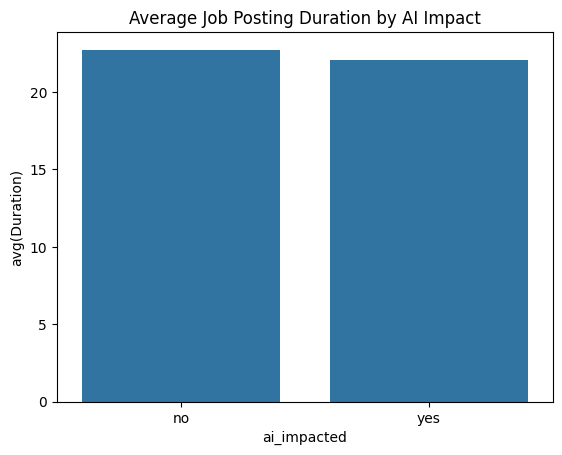

In [30]:
avg_duration = df.groupBy("ai_impacted").avg("Duration").toPandas()

sns.barplot(x="ai_impacted", y="avg(Duration)", data=avg_duration)
plt.title("Average Job Posting Duration by AI Impact")
plt.show()

In [11]:



categorical_cols = ["EDUCATION_LEVELS_NAME", "EMPLOYMENT_TYPE_NAME", "REMOTE_TYPE_NAME"]


indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_idx", handleInvalid='skip') for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=f"{col}_idx", outputCol=f"{col}_vec") for col in categorical_cols]


assembler = VectorAssembler(
    inputCols=[
        "MIN_YEARS_EXPERIENCE", "MAX_YEARS_EXPERIENCE", "DURATION"
    ] + [f"{col}_vec" for col in categorical_cols],
    outputCol="features"
)


pipeline = Pipeline(stages=indexers + encoders + [assembler])
data = pipeline.fit(df_clean).transform(df_clean)


data.select("salary", "features").show(5, truncate=False)

+------+-----------------------------------------------+
|salary|features                                       |
+------+-----------------------------------------------+
|131100|(24,[0,1,2,3,20,22],[2.0,2.0,11.0,1.0,1.0,1.0])|
|136950|(24,[0,1,2,7,20,23],[3.0,3.0,28.0,1.0,1.0,1.0])|
|136950|(24,[0,1,2,7,20,23],[3.0,3.0,28.0,1.0,1.0,1.0])|
|104000|(24,[0,1,2,3,20,22],[3.0,3.0,8.0,1.0,1.0,1.0]) |
|80000 |(24,[0,1,2,3,20,22],[3.0,3.0,37.0,1.0,1.0,1.0])|
+------+-----------------------------------------------+
only showing top 5 rows



In [ ]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=423548)


(1802, 118)


(441, 118)


In [16]:
from pyspark.ml.regression import GeneralizedLinearRegression

feature_names = assembler.getInputCols()

glr = GeneralizedLinearRegression(
    featuresCol="features",
    labelCol="SALARY",  # <-- use the correct case
    family="gaussian",
    link="identity",
    maxIter=10,
    regParam=0.3
)

glr_model = glr.fit(train_data)
summary = glr_model.summary